In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [63]:
df = pd.read_csv('../csv/hourly_aqi_data.csv')

df.head(3)

,timestamp,city,dominentpol,temperature,humidity,pm1,pm10,pm25,aqi
0,2025-10-30 19:02:57,"NED University, Karachi",pm25,31.60,29.98,96,56,148,148
1,2025-10-30 19:07:07,"NED University, Karachi",pm25,31.58,29.85,96,56,150,150
2,2025-10-30 20:08:54,"NED University, Karachi",pm25,31.10,30.57,125,61,159,159


## PreProcessing 

In [64]:
# What is the size of data

df.shape 

(188, 9)

In [65]:
# How the data looks like

df.sample(5)

,timestamp,city,dominentpol,temperature,humidity,pm1,pm10,pm25,aqi
127,2025-11-05 07:22:40,"NED University, Karachi",pm25,26.30,20.43,30,27,78,78
148,2025-11-06 05:41:12,"NED University, Karachi",pm25,22.70,28.47,89,55,142,142
158,2025-11-06 16:06:03,"NED University, Karachi",pm25,31.00,23.20,102,59,154,154
20,2025-10-31 15:08:16,"NED University, Karachi",pm25,33.75,22.58,140,72,170,170
94,2025-11-03 20:08:51,"NED University, Karachi",pm25,29.80,52.00,72,40,105,105


In [66]:
# what is the data type of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    188 non-null    object 
 1   city         188 non-null    object 
 2   dominentpol  188 non-null    object 
 3   temperature  188 non-null    float64
 4   humidity     188 non-null    float64
 5   pm1          188 non-null    int64  
 6   pm10         188 non-null    int64  
 7   pm25         188 non-null    int64  
 8   aqi          188 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 13.3+ KB


In [67]:
# How much null values 

df.isnull().sum() 

timestamp      0
city           0
dominentpol    0
temperature    0
humidity       0
pm1            0
pm10           0
pm25           0
aqi            0
dtype: int64

In [68]:
# How much data looks like mathematically

df.describe()

,temperature,humidity,pm1,pm10,pm25,aqi
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,29.467872,32.928032,114.702128,64.984043,152.776596,152.776596
std,2.338271,11.107305,42.787581,27.714255,47.148566,47.148566
min,22.700000,13.430000,13.000000,15.000000,43.000000,43.000000
25%,27.782500,23.760000,82.000000,48.000000,120.750000,120.750000
50%,29.400000,30.975000,106.000000,59.000000,155.000000,155.000000
75%,31.215000,40.435000,153.250000,76.000000,175.000000,175.000000
max,34.150000,56.650000,199.000000,156.000000,307.000000,307.000000


In [69]:
# what is the relation between the columns

df.corr(numeric_only = True)['aqi']

temperature   -0.323150
humidity       0.269023
pm1            0.953057
pm10           0.982622
pm25           1.000000
aqi            1.000000
Name: aqi, dtype: float64

## Exploratory Data Analysis (EDA)

### Basic Analysis

In [70]:
# Humidity Column

print(f'The maximum humidity is: {df.humidity.max()}')
print(f'The minimum humidity is: {df.humidity.min()}')
print(f'The mean humidity is: {df.humidity.mean()}')
df.humidity.skew()              

The maximum humidity is: 56.65
The minimum humidity is: 13.43
The mean humidity is: 32.928031914893616


np.float64(0.429673288708726)

In [71]:
# temperature Column

print(f'The maximum temperature is: {df.temperature.max()}')
print(f'The minimum temperature is: {df.temperature.min()}')
print(f'The mean temperature is: {df.temperature.mean()}')
df.temperature.skew()              

The maximum temperature is: 34.15
The minimum temperature is: 22.7
The mean temperature is: 29.467872340425533


np.float64(-0.00026599112397546236)

In [72]:
# pm1 Column

print(f'The maximum pm1 is: {df.pm1.max()}')
print(f'The minimum pm1 is: {df.pm1.min()}')
print(f'The mean pm1 is: {df.pm1.mean()}')
df.pm1.skew()              

The maximum pm1 is: 199
The minimum pm1 is: 13
The mean pm1 is: 114.70212765957447


np.float64(0.01127597204685908)

In [73]:
# pm10 Column

print(f'The maximum pm10 is: {df.pm10.max()}')
print(f'The minimum pm10 is: {df.pm10.min()}')
print(f'The mean pm10 is: {df.pm10.mean()}')
df.pm10.skew()              

The maximum pm10 is: 156
The minimum pm10 is: 15
The mean pm10 is: 64.98404255319149


np.float64(0.9829699976124702)

### Univariate / Bivaariate / Multivariate Analysis 

Text(0.5, 1.0, 'dominentpol')

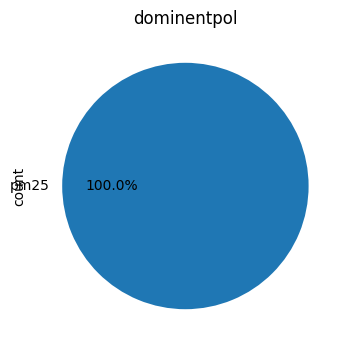

In [74]:
# pie chart for categorical data

plt.figure(figsize = (12, 4))
df.dominentpol.value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.title("dominentpol")

<Axes: xlabel='temperature', ylabel='Count'>

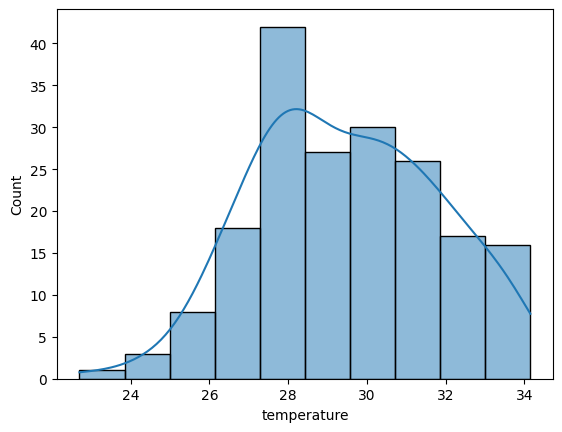

In [75]:
# histplot

sns.histplot(data = df, x = 'temperature', kde = True)

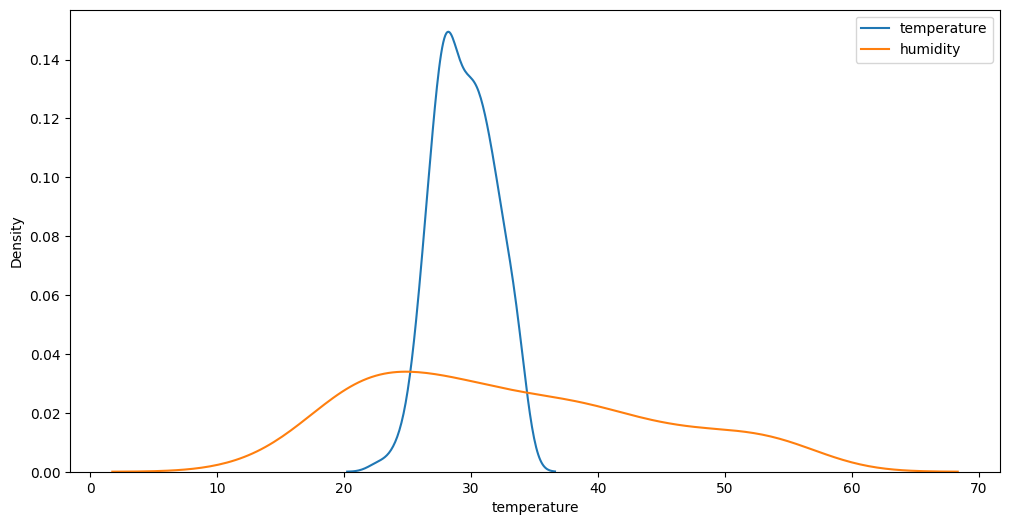

In [76]:
# kde plot (Separate)

plt.figure(figsize = (12, 6))

sns.kdeplot(data = df, x = 'temperature', label = 'temperature')
sns.kdeplot(data = df, x = 'humidity', label = 'humidity')

plt.legend()


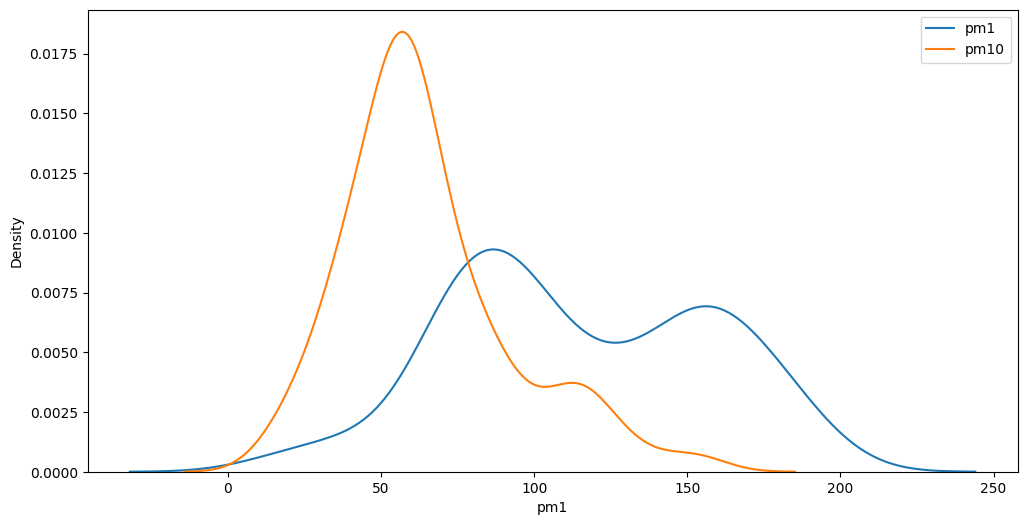

In [77]:
# kde plot (Separate)

plt.figure(figsize = (12, 6))

sns.kdeplot(data = df, x = 'pm1', label = 'pm1')
sns.kdeplot(data = df, x = 'pm10', label = 'pm10')

plt.legend()


Text(0.5, 1.0, 'humidity')

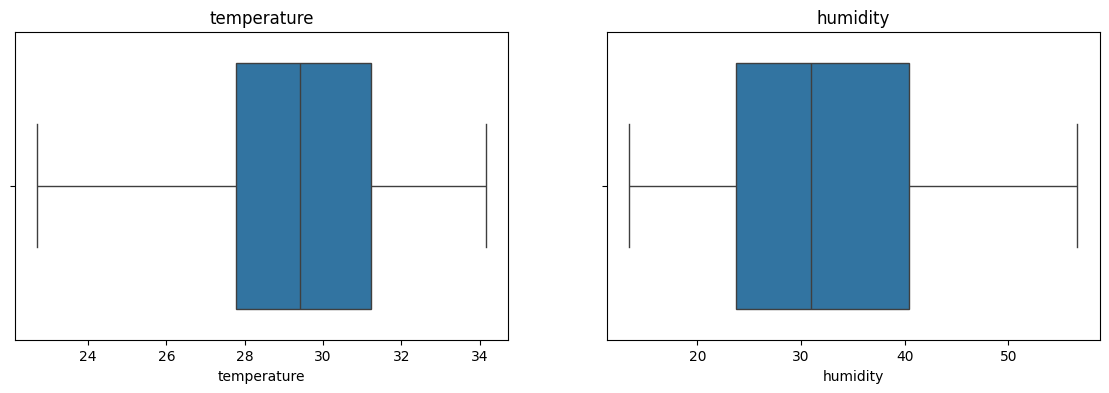

In [80]:
# Boxplot (For identifying the Outliers)

plt.figure(figsize = (14, 4))

plt.subplot(121)
sns.boxplot(data = df, x = 'temperature')
plt.title("temperature")

plt.subplot(122)
sns.boxplot(data = df, x = 'humidity')
plt.title("humidity")


Text(0.5, 1.0, 'pm10')

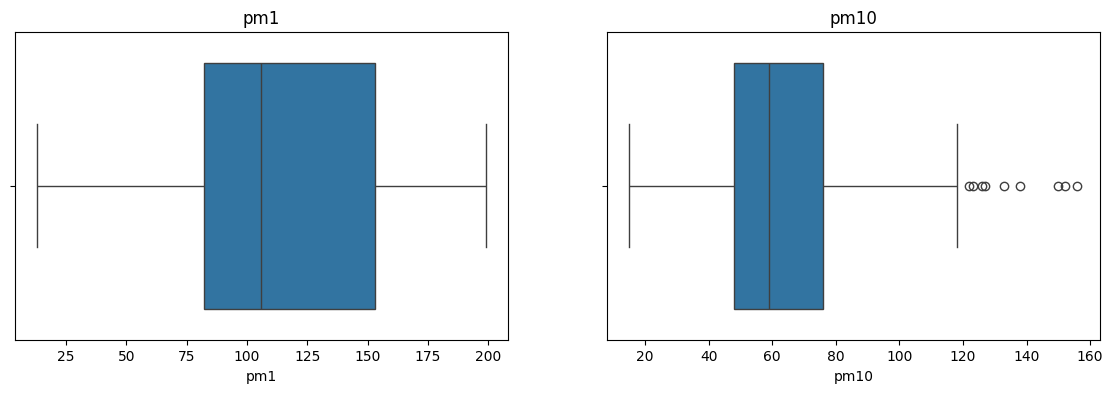

In [81]:
    plt.figure(figsize = (14, 4))
    
    plt.subplot(121)
    sns.boxplot(data = df, x = 'pm1')
    plt.title("pm1")
    
    plt.subplot(122)
    sns.boxplot(data = df, x = 'pm10')
    plt.title("pm10")

By using the boxplot, we have seen some outliers in the data so we need to detect and remove outliers in pipeline (I'll use the IQR method)

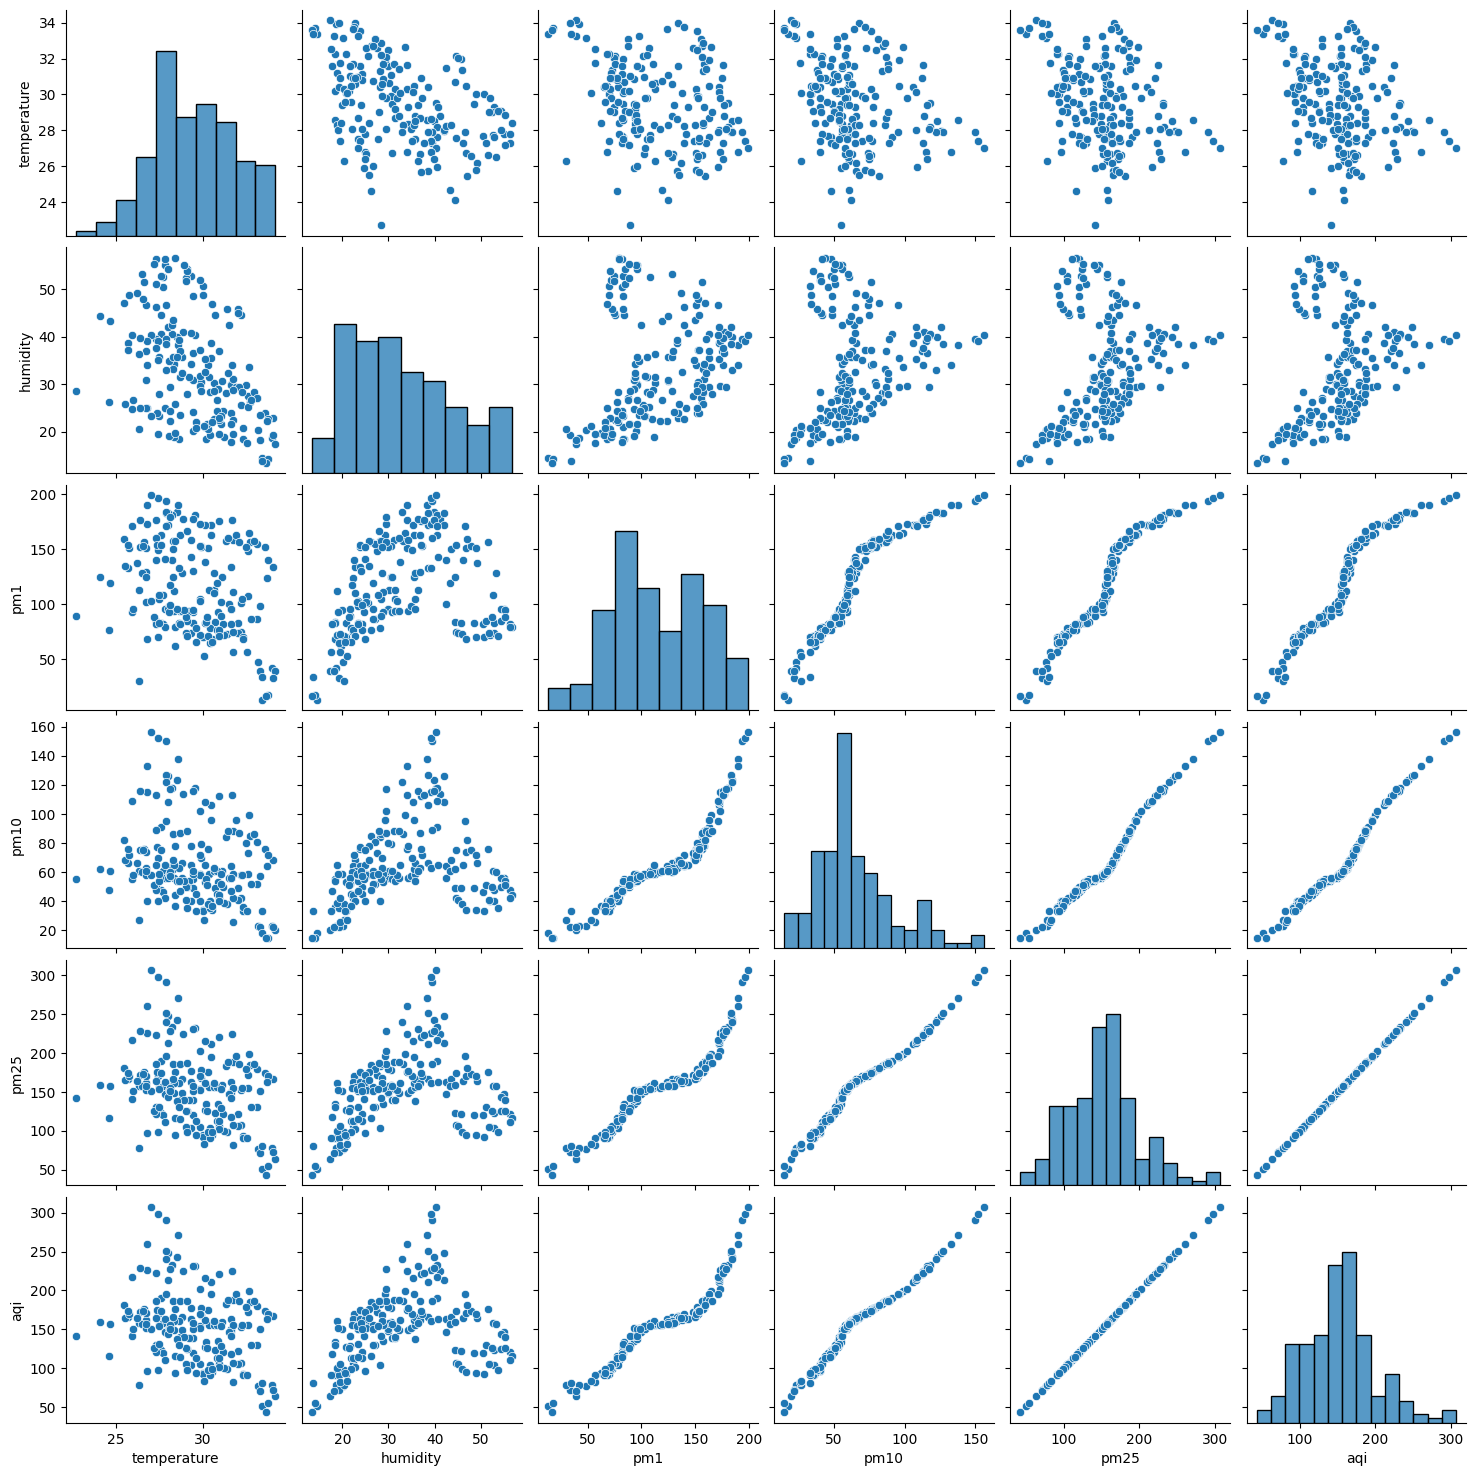

In [82]:
sns.pairplot(data = df)

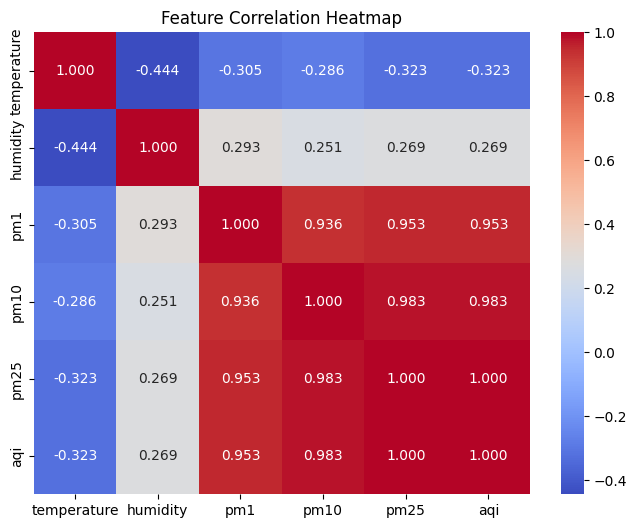

In [83]:
# Heatmap  (Explain the Correlation of all numeric columns)

# Compute correlation matrix
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Feature Correlation Heatmap')
plt.show()